In [198]:
# k crossover d，close > ema 8, ema 8 > ema 18, ema 18 > 38, take profit atr, stop loss atr
# Variables :
# time - 15m, 1h
# start time - 1609492611000, 1641028611000, 1672564611000 (2021, 2022, 2023) 1677632461000
# tp atr - 4, 6
# sl atr - 3, 5
# sl - Close, Low

In [199]:
# ! conda install -c conda-forge ta --yes

In [200]:
import requests
import pandas as pd
import ta
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import time
import mplfinance as mpf

In [201]:
interval_arr = ['15m', '1h', '4h', '1d']
start_time_arr = [1679706061000]
ema_arr = [8, 18, 38]
indicator_arr = ['bb_h', 'bb_m', 'bb_l']

In [202]:
timezone = 8
endpoint = 'wss://stream.binance.com:9443/ws'
symbol = 'ethusdt'
symbol_C = symbol.upper()
interval = '15m'

start_time = 1679274061000
end_time = round(time.time() * 1000)

# step between timestamps in milliseconds
step = 60000 * 3600

In [203]:
pro_per = 0.04
sl_atr = 0.025

In [204]:
def create_raw(symbol, interval_arr, start_time, end_time, step):
    
    url = "https://api.binance.com/api/v3/klines"
    
    for interval in interval_arr:

        raw_df = pd.DataFrame()
        
        for timestamp in range(start_time, end_time, step):
            params = {"symbol": symbol_C,
                      "interval": interval,
                      "startTime": timestamp,
                      "endTime": timestamp + step}
            response = requests.get(url, params=params).json()
            out = pd.DataFrame(response, columns = ["Open time", "Open", "High", "Low", "Close",
                                                   "Volume", "Close_Time", "Quote asset volume",
                                                   "Number of trades", "Taker buy base asset volume",
                                                   "Taker buy quote asset volume", "Ignore"])
            raw_df = pd.concat([raw_df, out], axis = 0)

        raw_df = raw_df[['Close_Time', 'Open', 'Close', "High", "Low", 'Volume']]

        raw_df.to_hdf(f'klines_{symbol}_{interval}.h5', key='df', mode='w')
        print(f"Created {symbol}_{interval}")

In [205]:
loop_start_time = time.time()
create_raw(symbol, interval_arr, min(start_time_arr), end_time, step)
loop_end_time = time.time()
print("Time taken to execute for loop:", loop_end_time - loop_start_time, "seconds")

Created ethusdt_15m
Created ethusdt_1h
Created ethusdt_4h
Created ethusdt_1d
Time taken to execute for loop: 4.3566789627075195 seconds


C:\Users\George\AppData\Local\Temp\ipykernel_6372\1070508557.py:23: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_values] [items->Index(['Close_Time', 'Open', 'Close', 'High', 'Low', 'Volume'], dtype='object')]

  raw_df.to_hdf(f'klines_{symbol}_{interval}.h5', key='df', mode='w')


In [206]:
h5 = pd.read_hdf(f'klines_{symbol}_{interval_arr[-1]}.h5', key='df')
print(h5)

      Close_Time           Open          Close           High            Low  \
0  1679875199999  1741.88000000  1773.88000000  1801.00000000  1739.31000000   
1  1679961599999  1773.88000000  1715.22000000  1780.48000000  1686.13000000   
0  1680047999999  1715.21000000  1772.99000000  1795.73000000  1701.13000000   
1  1680134399999  1773.00000000  1793.07000000  1827.99000000  1772.48000000   
2  1680220799999  1793.06000000  1793.61000000  1829.69000000  1763.00000000   
0  1680307199999  1793.60000000  1821.52000000  1847.28000000  1777.91000000   
1  1680393599999  1821.52000000  1820.79000000  1842.83000000  1807.81000000   
0  1680479999999  1820.80000000  1794.51000000  1824.81000000  1771.70000000   
1  1680566399999  1794.51000000  1810.51000000  1839.99000000  1762.77000000   
2  1680652799999  1810.51000000  1870.37000000  1891.91000000  1802.01000000   
0  1680739199999  1870.38000000  1908.69000000  1942.98000000  1864.58000000   
1  1680825599999  1908.68000000  1872.41

In [207]:
klines_cache = {}

def get_klines(symbol, interval, start_time, end_time):
    if (symbol, interval) not in klines_cache:
        klines_cache[(symbol, interval)] = pd.read_hdf(f'klines_{symbol}_{interval}.h5', key='df')

    df = klines_cache[(symbol, interval)].query(f"Close_Time >= {start_time} and Close_Time <= {end_time}")

    df = df[['Close_Time', 'Open', 'Close', "High", "Low", 'Volume']]

    df = df.set_index('Close_Time')
#     df = df.reset_index(drop=True)

    return df

In [208]:
def time_format(timezone):
#     df['Close_Time'] = pd.to_datetime(df['Close_Time'], unit='ms') + pd.Timedelta(hours=timezone)
#     df['Close_Time'] = df['Close_Time'].dt.strftime('%Y-%m-%d %H:%M:%S')
    df.index = pd.to_datetime(df.index, unit='ms') + pd.Timedelta(hours=timezone)
#     df.index = df.index.strftime('%Y-%m-%d %H:%M:%S')

C:\Users\George\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


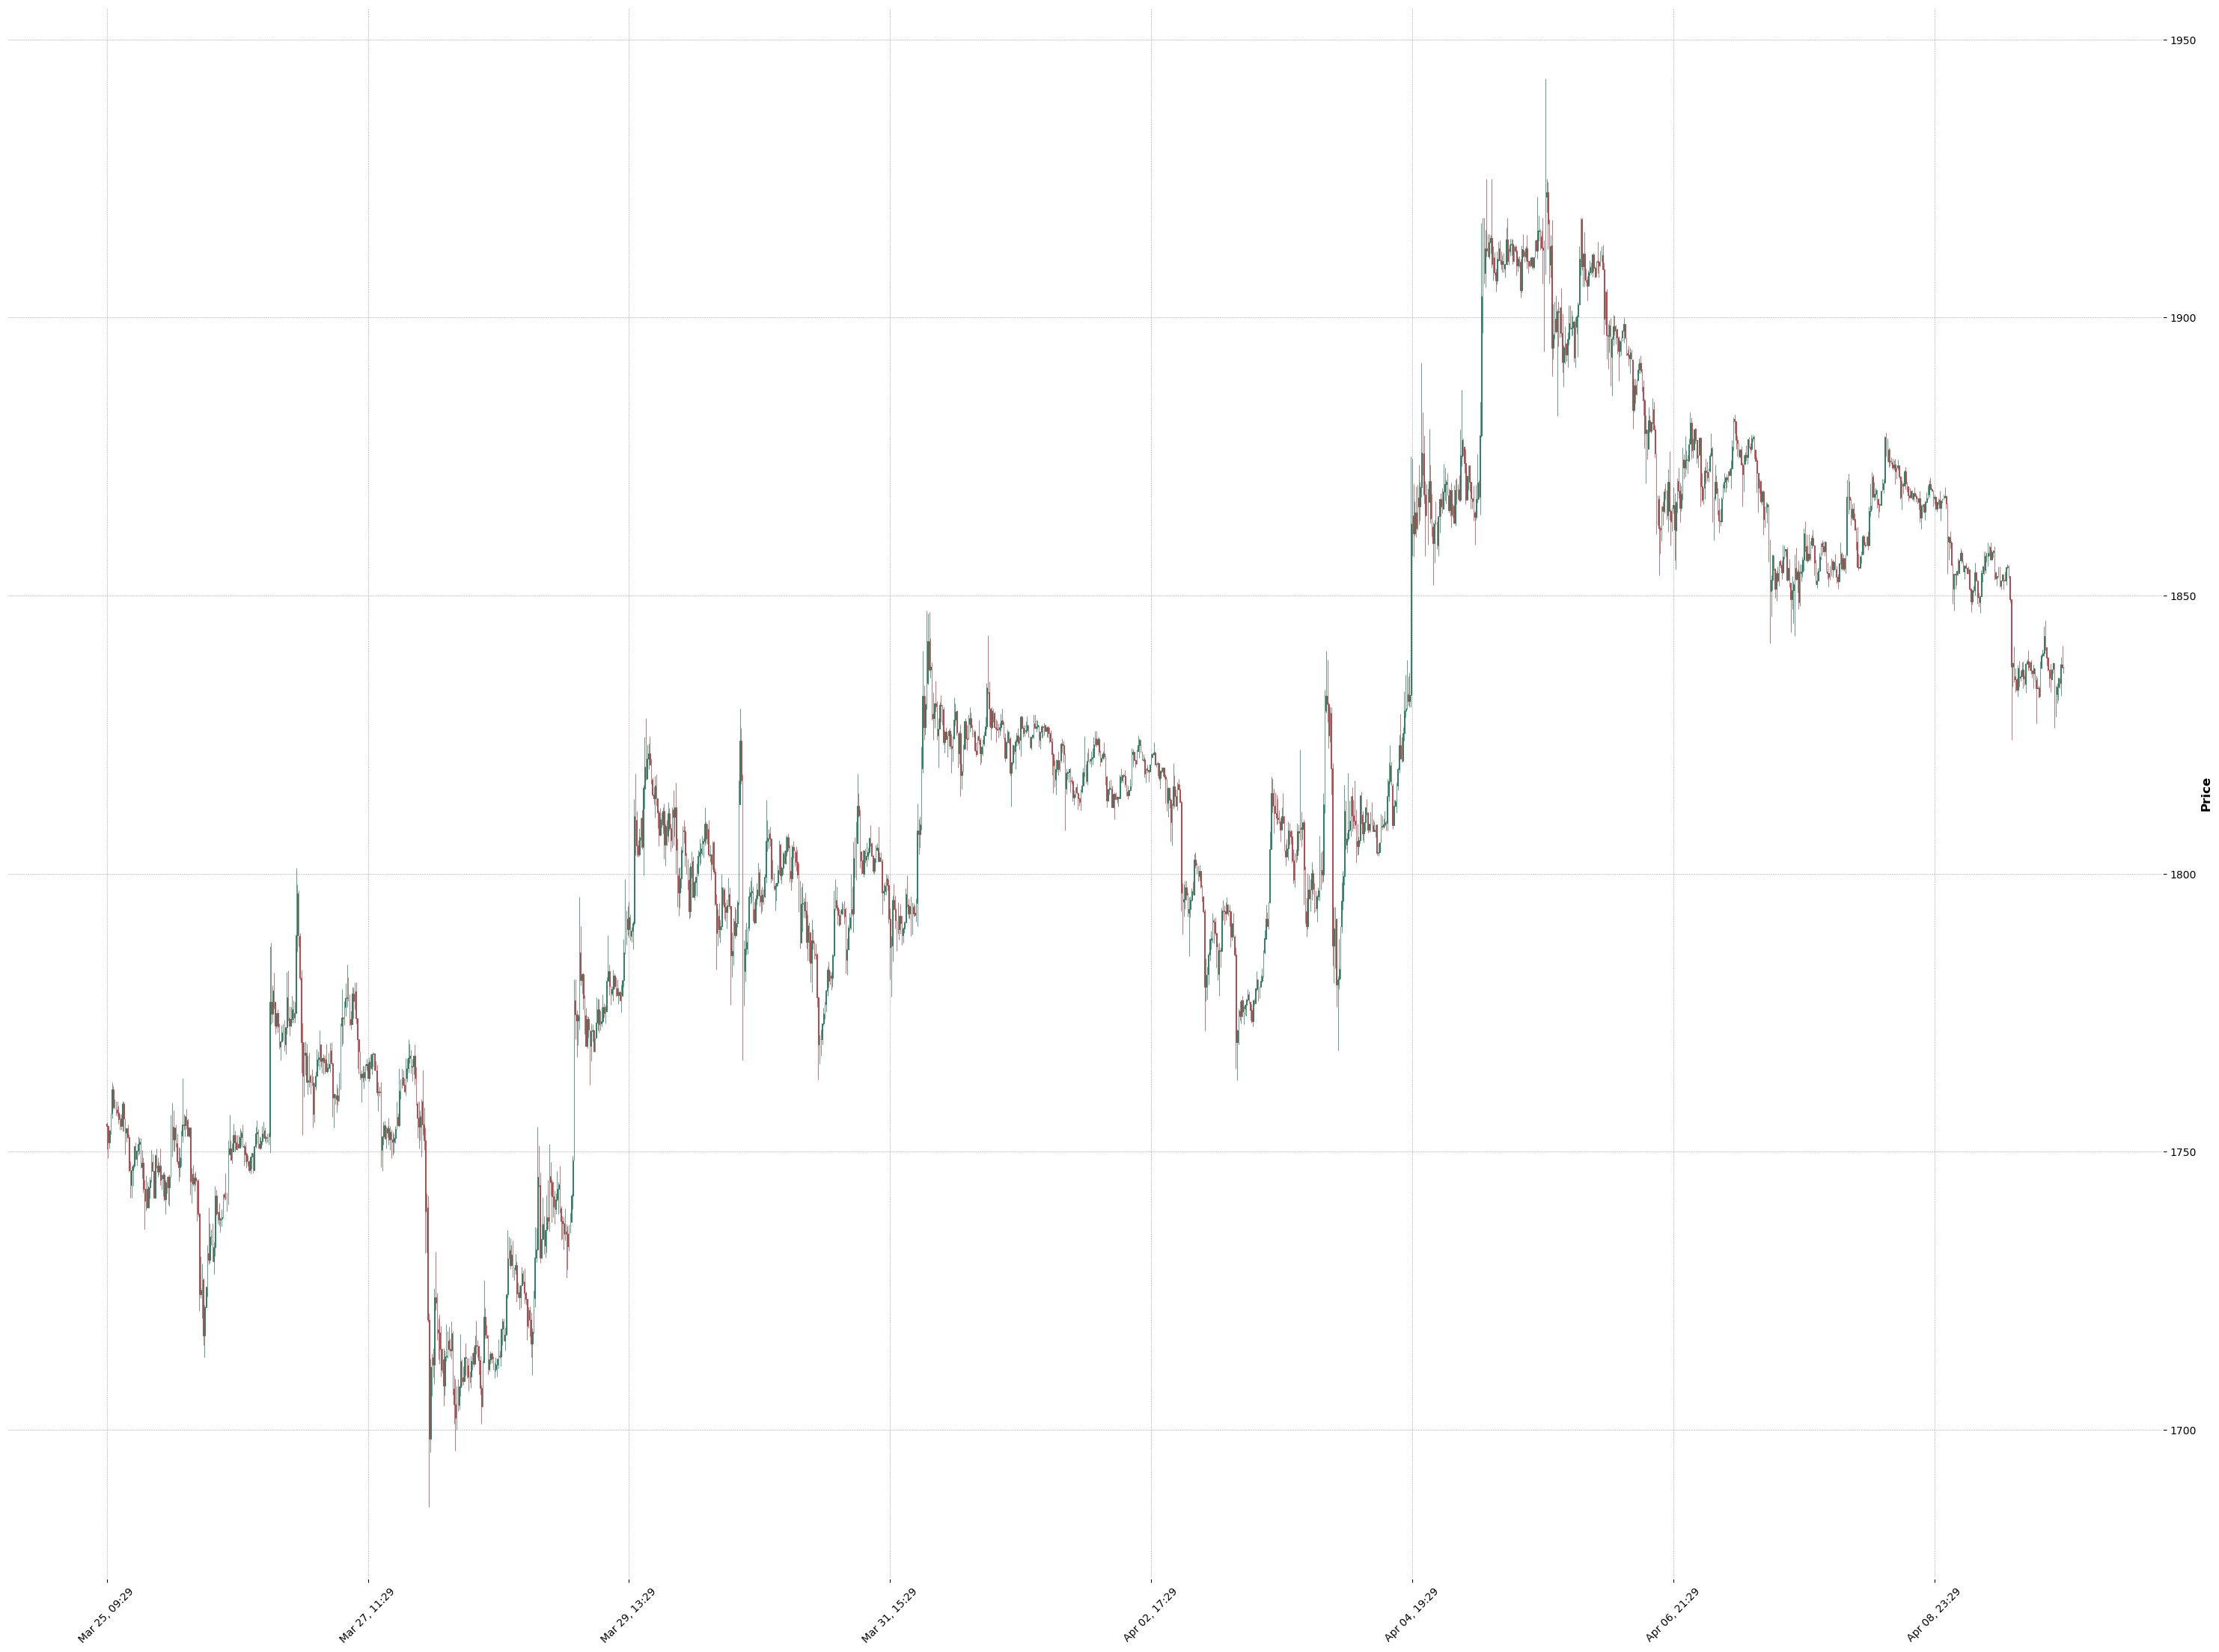

C:\Users\George\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\George\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\George\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\George\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - ht

ValueError: zero-size array to reduction operation maximum which has no identity

<Figure size 8000x6000 with 0 Axes>

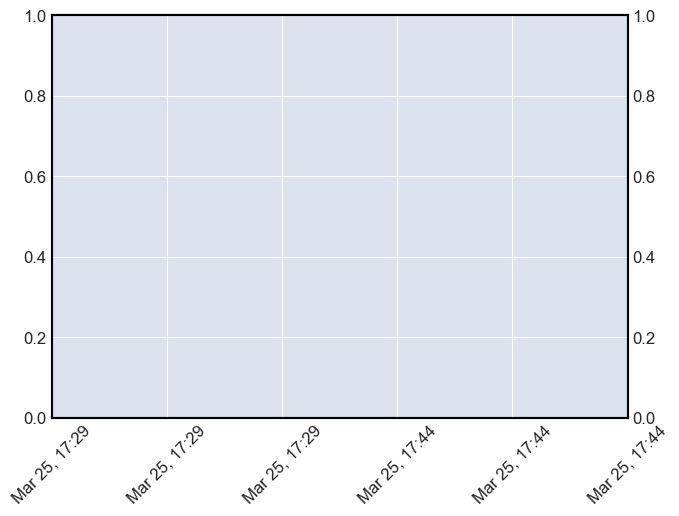

In [212]:
# using 
df = get_klines(symbol, interval_arr[0], start_time, end_time).copy()
time_format(timezone)
df = df.astype(float)
mpf.plot(df, type='candle', style='charles', figsize = (40,30))

# df = df.drop(columns=df.columns)

plt.figure(figsize=(80, 60))

for interval in interval_arr:
    for ema in ema_arr:
        raw_df = get_klines(symbol, interval, start_time, end_time)
        column_name = 'ema_{}_{}'.format(ema, interval)
        df[column_name] = ta.trend.ema_indicator(raw_df.Close, window=ema)

time_format(timezone)
df = df.round(2)

for interval in interval_arr:
    raw_df = get_klines(symbol, interval, start_time, end_time)
    raw_df.index = pd.to_datetime(raw_df.index, unit='ms') + pd.Timedelta(hours=timezone)
    df = df.astype(float).round(2)

    for ema in ema_arr:
        if interval == '15m':
            mrkr_size = 1
        elif interval == '1h':
            mrkr_size = 10
        elif interval == '4h':
            mrkr_size = 25
        elif interval == '1d':
            mrkr_size = 50
            
        scatter_plot = mpf.make_addplot(df['ema_{}_{}'.format(ema, interval)], scatter=True, markersize=50)
        mpf.plot(df, addplot=scatter_plot)
        
#         plt.scatter(df.index, df['ema_{}_{}'.format(ema, interval)], s = mrkr_size, label = 'ema_{}_{}'.format(ema, interval))


# plt.legend()
# plt.show()

# df_ema = pd.DataFrame(index=pd.date_range(start=start_time, end=end_time))

# for interval in interval_arr:

# df[['Open', 'Close', 'High', 'Low', 'Volume']].astype(float).round(2)

        
# indicators(df)


In [9]:
def check_cross(df, kd_dir):
    up = df['slow_k'] > df['slow_d']
    down = df['slow_k'] < df['slow_d']
    if kd_dir == 'Up':
        return up.diff() & up
    if kd_dir == 'Any':
        return up.diff()
    if kd_dir == 'Down':
        return down.diff() & down

def traceback_rsi(row, back_len, excl, rsi_bot):

    # second leg
    first_leg_rsi = df.loc[row - back_len - excl:row - excl, 'rsi']
    return any(first_leg_rsi <= rsi_bot)

    
def indicators(df):

# ema
    for i in (8, 18, 38):
        df['ema_'+str(i)] = ta.trend.ema_indicator(df.Close, window=i)
        
# bband
    bb_int = 30
    bb_dev = 2
    bb = ta.volatility.BollingerBands(df['Close'], window=bb_int, window_dev=bb_dev)
    df['bb_u'] = bb.bollinger_hband()
    df['bb_m'] = bb.bollinger_mavg()
    df['bb_l'] = bb.bollinger_lband()        

# atr
    df['atr'] = ta.volatility.average_true_range(df.High, df.Low, df.Close)
    
# rsi
    rsi_int = 14
    df['rsi'] = ta.momentum.RSIIndicator(df['Close'], window = rsi_int).rsi()

# kd
    kd_int = 14
    d_int = 3
   
    kd_df = pd.DataFrame()
    kd_df[str(kd_int) + '-Low'] = df['Low'].rolling(kd_int).min()
    kd_df[str(kd_int) + '-High'] = df['High'].rolling(kd_int).max()
    df['slow_k'] = (df['Close'] - kd_df[str(kd_int) + '-Low'])*100/(kd_df[str(kd_int) + '-High'] - kd_df[str(kd_int) + '-Low'])
    df['slow_d'] = df['slow_k'].rolling(d_int).mean()
    
# kd cross
#     df['kd_cross'] = check_cross(df, kd_dir)

# second leg

#     back_len = 20
#     excl = 4
#     rsi_bot = 30

#     df.loc[:, 'sec_leg'] = df.index.map(lambda row: traceback_rsi(row, back_len, excl, rsi_bot))



In [11]:
def conditions(df):

    for index, row in df.iterrows():
        # c1
        df['c1'] = df['Open'].shift(1) > df['Close'].shift(1)
        # c2
        df['c2'] = df['Close'] > df['Open']
        # c3
        df['c3'] = df['Close'] >= df['Open'].shift(1)
        
        df['c4'] = df['sec_leg']


    # 條件達成
    df['signal'] = False
    df.loc[df.c1 & df.c2 & df.c3 & df.c4, 'signal'] = True


    # 下一根進場
    df['open_entry'] = False
    for i in range(len(df) - 1):
        if df.loc[i, 'signal'] == True:
            df.loc[i + 1, 'open_entry'] = True
#     print(df[df['Close_Time'].str.contains('2023-03-11 16')])
    
    return df

In [12]:
conditions(df)

,Close_Time,Open,Close,High,Low,Volume,ema_8,ema_18,ema_38,bb_u,...,rsi,slow_k,slow_d,sec_leg,c1,c2,c3,c4,signal,open_entry
0,2023-01-01 15:14:59,1194.81,1194.37,1195.18,1193.63,1675.1834,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,False,False,False,False,False,False
1,2023-01-01 15:29:59,1194.36,1194.60,1194.61,1193.04,1522.0955,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,True,True,False,False,False,False
2,2023-01-01 15:44:59,1194.61,1195.16,1195.17,1193.80,910.7322,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,False,True,True,False,False,False
3,2023-01-01 15:59:59,1195.16,1195.06,1195.75,1194.61,1718.7587,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,False,False,True,False,False,False
4,2023-01-01 16:14:59,1195.07,1194.51,1195.90,1194.50,1266.4382,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9412,2023-04-09 17:29:59,1838.20,1837.04,1840.20,1836.59,2432.8717,1837.046692,1839.946595,1845.195041,1864.037602,...,38.516401,51.380126,47.770709,True,False,False,False,True,False,False
9413,2023-04-09 17:44:59,1837.05,1838.07,1838.14,1836.51,1518.4248,1837.274094,1839.749059,1844.829654,1863.169833,...,41.027872,69.222222,56.218392,True,True,True,False,True,False,False
9414,2023-04-09 17:59:59,1838.07,1836.52,1838.38,1835.94,1940.9867,1837.106518,1839.409158,1844.403518,1862.080254,...,38.480520,52.000000,57.534116,True,False,False,False,True,False,False
9415,2023-04-09 18:14:59,1836.51,1836.01,1836.52,1835.22,1414.6024,1836.862847,1839.051352,1843.973081,1860.835135,...,37.652153,49.880383,57.034202,True,True,False,False,True,False,False


In [13]:
entry_df = conditions(df).copy()

in_position = False
stop_loss = np.nan
take_profit = np.nan
close_val = entry_df['Close']
low_val = entry_df['Low']
atr_val = entry_df['atr']


for index, row in entry_df.iterrows():

    if index == 0:
        continue
    
    elif entry_df.at[index, 'open_entry'] == True:
   
        entry_df.at[index, 'entry_p'] = close_val.shift(1).at[index]
        entry_df.at[index, 'stop_loss'] = low_val.shift(1).at[index] - sl_atr * atr_val.shift(1).at[index]
        entry_df.at[index, 'take_profit'] = close_val.shift(1).at[index] * (1 + pro_per/10)
        entry_df.at[index, 'position'] = 'Buy'
        in_position = True
        stop_loss = entry_df.at[index, 'stop_loss']
        take_profit = entry_df.at[index, 'take_profit']
    

    # 吃筍
    #-----------------------------重要-----------------------------
    # 若用 if 寫，則有可能入場馬上吃筍，若用 elif 則一個 iteration 只會執行一次
    elif in_position == True and (entry_df.at[index, 'Close'] <= stop_loss):
        entry_df.at[index, 'position'] = 'Stop'
        in_position = False
        stop_loss = np.nan
        take_profit = np.nan

    # set take profit
    elif in_position == True and (entry_df.at[index, 'High'] >= take_profit):
        entry_df.at[index, 'position'] = 'Sell'
        in_position = False
        stop_loss = np.nan
        take_profit = np.nan
        
entry_df.to_csv('entry_df.csv')
        
raw_entry_df = entry_df.copy()

# 過濾有訊號或事件發生的Ｋ線
entry_df = entry_df[(entry_df['open_entry'] == True) |
              (entry_df['signal'] == True) | 
              (entry_df['position'] == 'Buy') |
              (entry_df['position'] == 'Sell') |
              (entry_df['position'] == 'Stop')]

print(entry_df)

               Close_Time     Open    Close     High      Low     Volume  \
81    2023-01-02 11:29:59  1196.61  1196.91  1197.24  1196.56   857.8667   
82    2023-01-02 11:44:59  1196.90  1197.73  1197.84  1196.90   732.6292   
83    2023-01-02 11:59:59  1197.72  1201.94  1203.53  1197.40  5749.0388   
87    2023-01-02 12:59:59  1200.73  1201.85  1201.86  1200.57   800.7658   
88    2023-01-02 13:14:59  1201.85  1201.21  1202.29  1201.10  1189.6371   
...                   ...      ...      ...      ...      ...        ...   
9387  2023-04-09 11:14:59  1854.19  1853.17  1854.29  1852.95   821.2798   
9404  2023-04-09 15:29:59  1833.11  1836.98  1837.44  1831.84  4678.6221   
9405  2023-04-09 15:44:59  1836.98  1835.21  1838.33  1833.57  4086.4150   
9410  2023-04-09 16:59:59  1834.18  1837.81  1837.82  1832.50  2243.1010   
9411  2023-04-09 17:14:59  1837.81  1838.20  1838.52  1837.57  1630.6505   

            ema_8       ema_18       ema_38         bb_u  ...     c1     c2  \
81    11

In [14]:
# 部位回測

pos_df = entry_df.copy()
pos_df = pos_df.reset_index(drop = True)
pos_df = pos_df[(pos_df['position'] == 'Buy') |
              (pos_df['position'] == 'Sell') |
              (pos_df['position'] == 'Stop')]

# 一次進場多少單位
pos_size = 1

col = ['Close_Time', 'Open', 'Close', 'High', 'Low', 'Volume', 'bb_l', 'position','entry_p', 'stop_loss', 'take_profit']
pos = pos_df[col]
pos = pos.reset_index(drop = True)


for index, row in pos.iterrows():
    
    current_pos = 0
    
    # 進場
    if pos.at[index, 'position'] == 'Buy':
        pos.at[index, 'size'] = pos_size
        pos.exit_p = np.nan
    
    # 出場
    if pos.at[index, 'position'] == 'Sell' or pos.at[index, 'position'] == 'Stop':
        
        #-----------------------------重要-----------------------------
        # 實戰需即刻出場
        
        # 停利：達成條件時收盤價
        if pos.at[index, 'position'] == 'Sell':
#             pos.at[index, 'exit_p'] = pos.at[index, 'Close']
            for i in range(index -1, -1, -1):
                if pos.at[i, 'position'] == 'Buy':
                    pos.at[index, 'exit_p'] = pos.at[i, 'take_profit']
                break

        # 停損：打到進場停損點（往回跌代，直到最近的'Buy'及其'stop_loss'）
        if pos.at[index, 'position'] == 'Stop':
            for i in range(index -1, -1, -1):
                if pos.at[i, 'position'] == 'Buy':
                    pos.at[index, 'exit_p'] = pos.at[i, 'stop_loss']
                break

        # 計算每次出場部位大小（每次出場皆清倉）
        for i in range(index -1, -1, -1):
            if pos.at[i, 'position'] == 'Buy':
                current_pos += pos.at[i, 'size']
                if i == 0:
                    pos.at[index, 'size'] = -current_pos
                else:
                    continue
            else:
                pos.at[index, 'size'] = -current_pos
                current_pos = 0
                break


# 計算部位價值
for index, row in pos.iterrows():
    if pos.at[index, 'position'] == 'Buy':
        pos.at[index, 'amt'] = round(pos.at[index, 'size'] * pos.at[index, 'entry_p'], 4)
    elif pos.at[index, 'position'] == 'Sell' or pos.at[index, 'position'] == 'Stop':
        pos.at[index, 'amt'] = round(pos.at[index, 'size'] * pos.at[index, 'exit_p'], 4)


# 若最後一筆為 Buy，移除該單，迭代驗證
for index, row in pos.iloc[::-1].iterrows():
    if row['position'] == 'Buy':
        pos = pos.drop(index)
    else:
        break


# 手續費、滑點、價差
fee = 0.05 / 100
amt_abs_sum = pos.amt.abs().sum()
ttl_fee = amt_abs_sum * fee


# 損益
leverage = 10
ttl_profit = -pos.amt.sum() - ttl_fee


# 計算獲利/虧損次數
agg_amts = []

for i in range(len(pos) - 1, -1, -1):

    if pos.loc[i, 'position'] in ['Stop', 'Sell']:
        
        # look out for the + sign
        total_amt = pos.loc[i, 'amt'] + np.absolute(pos.loc[i, 'amt']) * fee
        
        # iterate backwards from the current row until reaching another 'Stop' or 'Sell'
        # watch out for the + in total_amt += trading_fee
        j = i - 1
        while j >= 0 and pos.loc[j, 'position'] not in ['Stop', 'Sell']:
            total_amt += pos.loc[j, 'amt']
            trading_fee = np.absolute(pos.loc[j, 'amt']) * fee
            total_amt += trading_fee
            j -= 1
        
        # add the aggregated amount to the list
        agg_amts.append(total_amt)

agg_amts.reverse()


# 計算進場最大部位，最大損益
consec_entry = 0
position_amt_sum = 0
max_consec_entry = 0
max_position = 0
max_profit = 0
max_loss = 0

for index, row in pos.iterrows():
    
    if row['position'] == 'Buy':
        
        consec_entry += 1
        position_amt_sum += row['amt']
        
    elif row['position'] in ['Sell', 'Stop']:
        
        if consec_entry > max_consec_entry:
            max_consec_entry = consec_entry
            max_position = position_amt_sum
            
        position_amt_sum += row['amt']
        
        if -position_amt_sum > max_profit:
            max_profit = -position_amt_sum
            
        if -position_amt_sum < max_loss:
            max_loss = -position_amt_sum
            
        consec_entry = 0
        position_amt_sum = 0
    
    else:
        pass

# 最大部位
profit_per = "{:.2f}%".format(ttl_profit / (max_position/leverage) * 100)


# 勝率
wins = 0
loses = 0

for trade in agg_amts:
    if trade < 0:
        wins += 1
    elif trade > 0:
        loses += 1

win_rate = "{:.2f}%".format(wins / (wins + loses) * 100)


# 結果
result = {'Profit': [round(ttl_profit, 2)],
          'Fee': [round(ttl_fee, 2)],
          'Max_Profit': [round(max_profit, 2)],
          'Max_Loss': [round(max_loss, 2)],
          'Max_Entry': [max_consec_entry],
          'Max_Position': [round(max_position, 2)],
          'Profit_%': [profit_per],
          'Win_Rate': [win_rate]}


result_df = pd.DataFrame(result)

print(result_df)
print()
print(pos)

pos.to_csv('pos.csv')


   Profit     Fee  Max_Profit  Max_Loss  Max_Entry  Max_Position Profit_%  \
0  -60.66  385.75        65.4    -40.42          6       9277.22   -6.54%   

  Win_Rate  
0   52.73%  

              Close_Time     Open    Close     High      Low     Volume  \
0    2023-01-02 11:44:59  1196.90  1197.73  1197.84  1196.90   732.6292   
1    2023-01-02 11:59:59  1197.72  1201.94  1203.53  1197.40  5749.0388   
2    2023-01-02 13:14:59  1201.85  1201.21  1202.29  1201.10  1189.6371   
3    2023-01-02 13:44:59  1201.91  1202.55  1202.55  1201.14  1139.6957   
4    2023-01-02 14:29:59  1202.75  1202.58  1203.72  1202.58   845.2657   
..                   ...      ...      ...      ...      ...        ...   
402  2023-04-09 06:14:59  1854.73  1851.16  1854.74  1851.01  3023.4744   
403  2023-04-09 08:29:59  1849.92  1854.05  1854.53  1849.91  2354.1625   
404  2023-04-09 08:59:59  1855.27  1854.52  1858.00  1853.81  2083.0482   
405  2023-04-09 09:29:59  1857.15  1857.20  1857.74  1856.08  1390.6

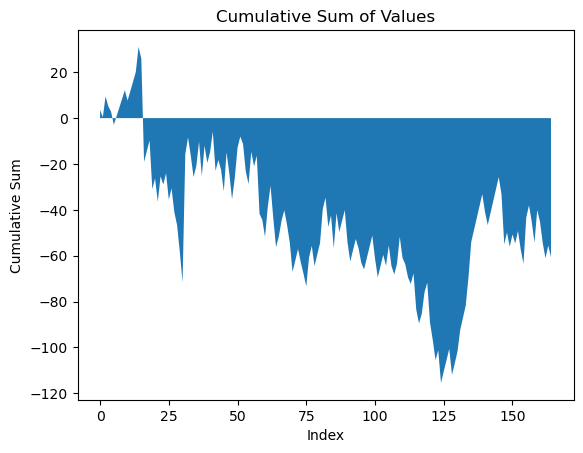

[3.5882961999998897, 0.41338029999953596, 9.457671999999004, 5.107845349999158, 2.833817249999237, -2.934687050000994, 0.8144718499991179, 4.587604749999189, 8.37017134999918, 12.169396849999165, 7.671453899998987, 11.696638649998917, 15.893528849998834, 20.1603523999988, 31.051389799998766, 25.963491899998633, -19.071628100001565, -14.405081200001586, -9.719666900001538, -30.957778200001588, -26.346094700001633, -36.466292750001536, -25.399183050001618, -28.924464350001525, -24.041631750001518, -35.531155800001734, -30.647333850001722, -40.92330745000139, -46.62494480000145, -58.2567743500013, -71.67270010000118, -15.58102090000093, -8.458662400000906, -16.493445850001194, -25.654190300001297, -20.955045150001546, -10.290783450001616, -25.202950650001753, -12.071488000001985, -19.55566155000194, -14.877802200001854, -5.896852150002157, -22.991681750002165, -18.269831750002126, -22.4731907500021, -31.891264350002086, -14.926340300001488, -24.040537450001523, -35.37923885000129, -26.027

In [15]:
cumulative_values = []
cumulative_sum = 0
for value in agg_amts:
    cumulative_sum -= value
    cumulative_values.append(cumulative_sum)

plt.fill_between(range(len(cumulative_values)), cumulative_values, 0)

plt.xlabel('Index')
plt.ylabel('Cumulative Sum')
plt.title('Cumulative Sum of Values')

plt.show()

print(cumulative_values)

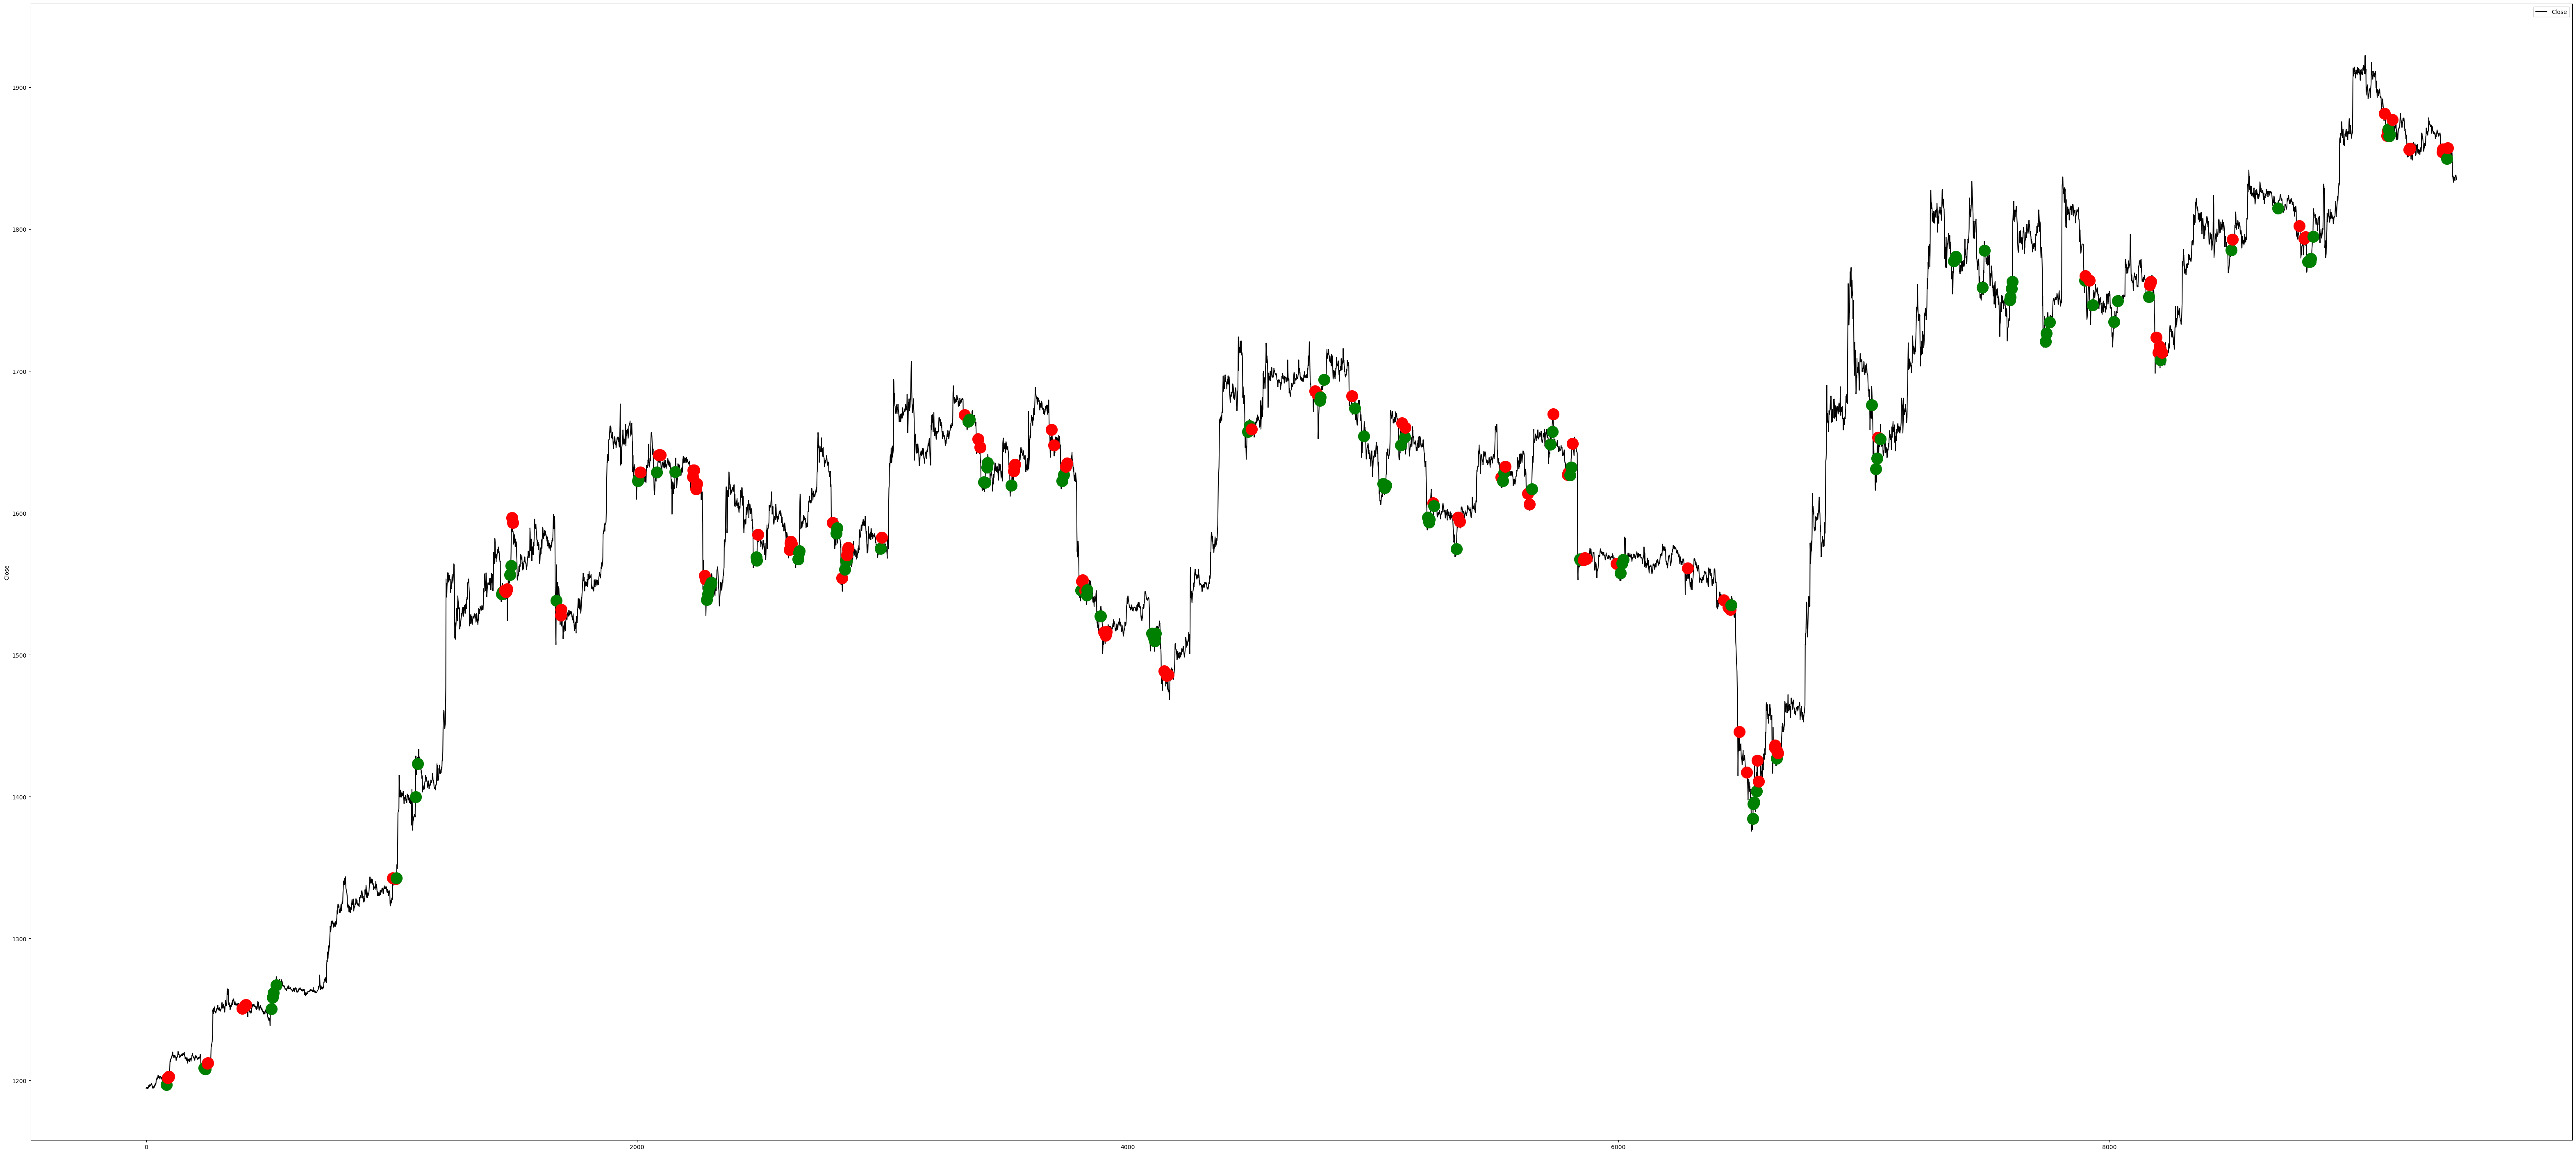

In [16]:
plt_df = raw_entry_df.copy()

plt.figure(figsize=(80, 36))
plt.ylabel('Close')
plt.plot(plt_df.Close, label = 'Close', c ='black')

i = 0
while i < len(plt_df):
    if pd.isna(plt_df.position[i]):
        i += 1
    elif plt_df.position[i] == 'Buy':
        j = i + 1
        while j < len(plt_df) and (pd.isna(plt_df.position[j]) or plt_df.position[j] == 'Buy'):
            j += 1
        if j < len(plt_df) and plt_df.position[j] == 'Sell':
            # Paint all previous 'Buy's green dot
            for k in range(i, j+1):
                plt.plot(k, plt_df.entry_p[k], 'go', label='_', markersize=20)
            i = j
        elif j < len(plt_df) and plt_df.position[j] == 'Stop':
            # Paint all previous 'Buy's red dot
            for k in range(i, j+1):
                plt.plot(k, plt_df.entry_p[k], 'ro', label='_', markersize=20)
            i = j + 1
        else:
            i = j
    else:
        i += 1

plt.legend()
plt.show()


# 之所以出現大量紅點，原因為：連續加倉會調整整個部位停利和停損，因此一些進倉部位會因為調高後的＂整個部位＂停損而出場，但該入場損益依舊為正
# 意思是該部位之停損已經高於許多前面部位之進場點位